## Voy a hacer un analisis de la relacion entre que palabras contienen los tweets y su veracidad. Este analisis abarca, cantidad de palabras, cantidad de caracteres y palabras que aparecen.

#### Importo las librerias necesarias

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

from bokeh.plotting import figure, output_file, show
from matplotlib.colors import ListedColormap
from PIL import Image
from wordcloud import WordCloud
from math import log, sqrt

Defino una paleta de colores

#### Creo el data frame en base al csv

In [2]:
cmap = cm.get_cmap('YlOrBr')

In [3]:
tweets = pd.read_csv('csv/train.csv', encoding='latin-1')

#### Analizo como esta formado mi data frame

In [4]:
tweets.sample(n=3)

,id,keyword,location,text,target
3788,5380,fire%20truck,NaN,It's never a good sign when you pull up to wor...,1
1124,1621,bombed,melbourne,Today Japan marks 70 yrs since the U.S (A) bom...,1
5165,7366,obliterate,United Kingdom,WWE 2K15: Universe Mode - Part 149 - OBLITERAT...,0


#### Tanto la columna de location, keyword e id son irrelevantes para este analisis.

In [5]:
del(tweets['keyword'])
del(tweets['location'])
tweets.sample(n=3)

,id,text,target
7457,10672,@BritishBakeOff This has opened up old baked a...,0
6903,9896,@VickyBrush LOL! I was a traumatised child. On...,0
2432,3494,.@unsuckdcmetro Is the train half-derailed or ...,1


#### me guardo cuantos caracteres contiene cada tweet

In [6]:
tweets['nºcaracteres'] = tweets['text'].str.len()

In [7]:
tweets.sample(n=3)

,id,text,target,nºcaracteres
4373,6213,California School Bus Hijacker Parole Stands h...,1,79
5536,7897,I liked a @YouTube video http://t.co/V57NUgmGK...,1,101
2035,2921,@therealRITTZ #FETTILOOTCH IS #SLANGLUCCI OPPR...,0,116


#### Ahora me interesa separar el texto en palabras.

In [8]:
tweets['palabras']=tweets['text'].str.split()

In [9]:
tweets.head()

,id,text,target,nºcaracteres,palabras
0,1,Our Deeds are the Reason of this #earthquake M...,1,69,"[Our, Deeds, are, the, Reason, of, this, #eart..."
1,4,Forest fire near La Ronge Sask. Canada,1,38,"[Forest, fire, near, La, Ronge, Sask., Canada]"
2,5,All residents asked to 'shelter in place' are ...,1,133,"[All, residents, asked, to, 'shelter, in, plac..."
3,6,"13,000 people receive #wildfires evacuation or...",1,65,"[13,000, people, receive, #wildfires, evacuati..."
4,7,Just got sent this photo from Ruby #Alaska as ...,1,88,"[Just, got, sent, this, photo, from, Ruby, #Al..."


#### Reordeno las columnas para mayor claridad.

In [10]:
tweets = tweets[['id','text','palabras','nºcaracteres','target']]

In [11]:
tweets.head()

,id,text,palabras,nºcaracteres,target
0,1,Our Deeds are the Reason of this #earthquake M...,"[Our, Deeds, are, the, Reason, of, this, #eart...",69,1
1,4,Forest fire near La Ronge Sask. Canada,"[Forest, fire, near, La, Ronge, Sask., Canada]",38,1
2,5,All residents asked to 'shelter in place' are ...,"[All, residents, asked, to, 'shelter, in, plac...",133,1
3,6,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #wildfires, evacuati...",65,1
4,7,Just got sent this photo from Ruby #Alaska as ...,"[Just, got, sent, this, photo, from, Ruby, #Al...",88,1


#### Me interesa saber cuantas palabras tiene que cada tweet.

In [12]:
type(tweets['palabras'])

pandas.core.series.Series

#### Guardo la cantidad de palabras en una nueva columna

In [13]:
lista_auxiliar = []
for i in tweets['palabras']:
    lista_auxiliar.append( len(i) )

In [14]:
tweets['nºpalabras'] = lista_auxiliar

In [15]:
tweets.head()

,id,text,palabras,nºcaracteres,target,nºpalabras
0,1,Our Deeds are the Reason of this #earthquake M...,"[Our, Deeds, are, the, Reason, of, this, #eart...",69,1,13
1,4,Forest fire near La Ronge Sask. Canada,"[Forest, fire, near, La, Ronge, Sask., Canada]",38,1,7
2,5,All residents asked to 'shelter in place' are ...,"[All, residents, asked, to, 'shelter, in, plac...",133,1,22
3,6,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #wildfires, evacuati...",65,1,8
4,7,Just got sent this photo from Ruby #Alaska as ...,"[Just, got, sent, this, photo, from, Ruby, #Al...",88,1,16


#### Guardo en cada tweet la cantidad de 

#### Reordeno

In [16]:
tweets = tweets[['id','text','palabras','nºcaracteres','nºpalabras','target']]

In [17]:
tweets.head()

,id,text,palabras,nºcaracteres,nºpalabras,target
0,1,Our Deeds are the Reason of this #earthquake M...,"[Our, Deeds, are, the, Reason, of, this, #eart...",69,13,1
1,4,Forest fire near La Ronge Sask. Canada,"[Forest, fire, near, La, Ronge, Sask., Canada]",38,7,1
2,5,All residents asked to 'shelter in place' are ...,"[All, residents, asked, to, 'shelter, in, plac...",133,22,1
3,6,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #wildfires, evacuati...",65,8,1
4,7,Just got sent this photo from Ruby #Alaska as ...,"[Just, got, sent, this, photo, from, Ruby, #Al...",88,16,1


#### Ya tengo bastante ordenado el data frame. Procedo a analizar.

## Palabras que tienen mas ocurrencias en tweets.

#### Procedo a crear un nuevo dataframe, donde levanto cada palabra junto con su target y id de tweet.

In [18]:
palabras = tweets.explode('palabras')
del(palabras['text'])
del(palabras['nºcaracteres'])
del(palabras['nºpalabras'])
palabras.rename({'palabras': 'palabra', 'id': 'id_tweet','target': 'target_tweet' }, axis=1, inplace=True)
palabras.reset_index(inplace = True, drop = True)
palabras.head()

,id_tweet,palabra,target_tweet
0,1,Our,1
1,1,Deeds,1
2,1,are,1
3,1,the,1
4,1,Reason,1


#### En el analisis no voy a discrimnar por mayusculas, paso todo a minuscula.

In [19]:
palabras['palabra'] = palabras['palabra'].str.lower()
palabras.head()

,id_tweet,palabra,target_tweet
0,1,our,1
1,1,deeds,1
2,1,are,1
3,1,the,1
4,1,reason,1


#### Hay casos donde la palabra empieza con un caracter especial, ejemplo de #.

In [20]:
palabras.iloc[7]

id_tweet                  1
palabra         #earthquake
target_tweet              1
Name: 7, dtype: object

#### Yo quiero eliminar dichos caracteres, ya que en el caso que se encuentren ""#earthquake" y "earthquake" busco que cuenten como la misma palabra. 

In [21]:
import re
palabras_limpias = []
for palabra in palabras['palabra']:
    palabra_limpia = re.sub('[^A-Za-z0-9]+','', palabra)
    palabras_limpias.append(palabra_limpia)

In [22]:
palabras['palabra']=palabras_limpias

In [23]:
palabras.iloc[7]

id_tweet                 1
palabra         earthquake
target_tweet             1
Name: 7, dtype: object

#### Ahora ya borramos los caracteres especiales, el siguiente paso es borrar las palabras que aparecen 2 veces en un tweet. Esto es para que las ocurrencias no cuenten doble.


In [24]:
palabras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113461 entries, 0 to 113460
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id_tweet      113461 non-null  int64 
 1   palabra       113461 non-null  object
 2   target_tweet  113461 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ MB


In [25]:
palabras.drop_duplicates(subset=['palabra','id_tweet'], keep="first", inplace = True)
palabras.reset_index(inplace = True, drop = True)

In [26]:
palabras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107617 entries, 0 to 107616
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id_tweet      107617 non-null  int64 
 1   palabra       107617 non-null  object
 2   target_tweet  107617 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ MB


#### Ya fueron eliminadas las palabras repetidas de cada tweet, todo listo para el analisis

In [27]:
agrupadas=palabras.groupby(['palabra']).agg({'target_tweet':['mean','count','sum']})
agrupadas.sample(3)

target_tweet          
                          mean count sum
palabra                                 
httptcomiubkz77m6          0.0     1   0
httptco9xo9mkqqsi          1.0     1   1
crockery                   1.0     1   1

#### En este caso sum son las veces que la palabra aparece en tweets veridicos.(ya que el true esta representado con un uno)

#### Aplano el level de las columnas.

In [28]:
level0 = agrupadas.columns.get_level_values(0)
level1 = agrupadas.columns.get_level_values(1)
agrupadas.columns = level0 + '_' + level1

In [29]:
agrupadas.sample(3)

,target_tweet_mean,target_tweet_count,target_tweet_sum
palabra,,,
dispute,1.0,1,1
httptcor8k6rxw6d6,1.0,1,1
washable,0.0,1,0


#### Renombro 

In [30]:
agrupadas.rename({'target_tweet_mean': 'porcentaje_veraces', 'target_tweet_count': 'apariciones_totales','target_tweet_sum':'apariciones_veraces'}, axis=1, inplace=True)

In [31]:
agrupadas.sample(3)

,porcentaje_veraces,apariciones_totales,apariciones_veraces
palabra,,,
httptcokxy56fr8vm,1.00,1,1
httpstcools6qdi9um,1.00,1,1
unlocking,0.75,4,3


#### Transformo el ratio en porcentaje

In [32]:
agrupadas['porcentaje_veraces'] = agrupadas['porcentaje_veraces']*100

In [33]:
agrupadas.sample(3)

,porcentaje_veraces,apariciones_totales,apariciones_veraces
palabra,,,
hughes1128,0.0,1,0
roofing,100.0,1,1
station,75.0,4,3


##### Agrego una columna de apariciones_falaces

In [34]:
agrupadas['apariciones_falaces'] = (agrupadas['apariciones_totales'] - agrupadas['apariciones_veraces'])

In [35]:
agrupadas.sample(3)

,porcentaje_veraces,apariciones_totales,apariciones_veraces,apariciones_falaces
palabra,,,,
prosser,0.0,1,0,1
httptcotxrswi0efg,100.0,1,1,0
httptco4hngtkdqmv,0.0,1,0,1


#### Considero que las palabras que aparecen menos del 0.2% de los tweets son irrelevantes para este analisis. Suelen ser 'one hit'

In [36]:
agrupadas.info() #palabras previo a filtrar

<class 'pandas.core.frame.DataFrame'>
Index: 22365 entries,  to zzzz
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   porcentaje_veraces   22365 non-null  float64
 1   apariciones_totales  22365 non-null  int64  
 2   apariciones_veraces  22365 non-null  int64  
 3   apariciones_falaces  22365 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 873.6+ KB


In [37]:
minimo_de_ocurrencias = (0.2/100)*len(tweets.index)
minimo_de_ocurrencias

15.226

In [38]:
agrupadas = agrupadas.loc[agrupadas[('apariciones_totales')]>minimo_de_ocurrencias,:]

In [39]:
agrupadas.info() #palabras despues de filtrar

<class 'pandas.core.frame.DataFrame'>
Index: 1038 entries,  to zone
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   porcentaje_veraces   1038 non-null   float64
 1   apariciones_totales  1038 non-null   int64  
 2   apariciones_veraces  1038 non-null   int64  
 3   apariciones_falaces  1038 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 40.5+ KB


#### Ordeno segun porcentaje de veracidad y apariciones totales.

In [40]:
agrupadas.sort_values(by=['porcentaje_veraces', 'apariciones_totales'], ascending=[False, False], inplace = True)

In [41]:
agrupadas.head()

,porcentaje_veraces,apariciones_totales,apariciones_veraces,apariciones_falaces
palabra,,,,
mh370,100.0,69,69,0
northern,100.0,64,64,0
debris,100.0,49,49,0
severe,100.0,44,44,0
derailment,100.0,40,40,0


#### Reordeno columnas

In [42]:
agrupadas = agrupadas[['apariciones_veraces', 'apariciones_falaces', 'apariciones_totales', 'porcentaje_veraces']]
agrupadas.head()

,apariciones_veraces,apariciones_falaces,apariciones_totales,porcentaje_veraces
palabra,,,,
mh370,69,0,69,100.0
northern,64,0,64,100.0
debris,49,0,49,100.0
severe,44,0,44,100.0
derailment,40,0,40,100.0


### Me armo mi array de colores 

In [43]:
saltos = np.linspace(0.3, 0.7, 20)
colores = cmap(saltos)


#### Como se distrubuyen las palabras a lo largo del porcentaje de veracidad? donde se concentran mas?

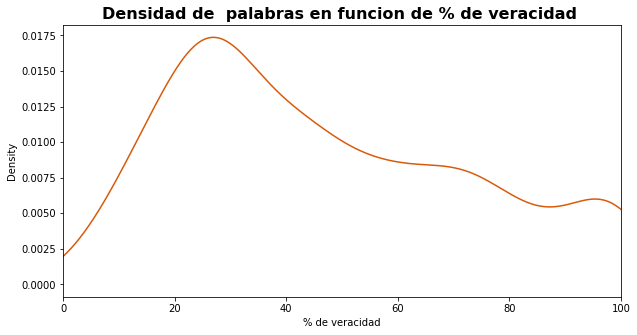

In [44]:
color = tuple( colores[19] )
fig=plt.figure()
ax = fig.add_subplot(111)
plt.xlim(0,100)
plt.title('Densidad de  palabras en funcion de % de veracidad ',fontsize=16,fontweight='bold')
ax.set_xlabel('% de veracidad')
agrupadas['porcentaje_veraces'].plot.kde(color = color , figsize=(10, 5));

#### Con esto se puede observar que en aproximadamente el 30% de la veracidad es donde se asocian mas palabras diferentes. Esto es debido a que suelen haber mas tweets verdaderos que falsos, por lo tanto es esperable que el pico este desviado hacia la izquierda del 50%.

#### Ahora veo como se distribuyen las palabras en funciona su % de veracidad y sus repeticiones.

In [45]:
agrupadas.head(100)

,apariciones_veraces,apariciones_falaces,apariciones_totales,porcentaje_veraces
palabra,,,,
mh370,69,0,69,100.000000
northern,64,0,64,100.000000
debris,49,0,49,100.000000
severe,44,0,44,100.000000
derailment,40,0,40,100.000000
...,...,...,...,...
razed,30,3,33,90.909091
officer,20,2,22,90.909091
pm,58,6,64,90.625000


#### Se puede observar que hay mucha palabras con el mas de 0.2 % de apariciones que tienen 100 de veracidad, observo como se relaciona la veracidad una palabra en relacion con la cantidad de repeticiones de la misma.

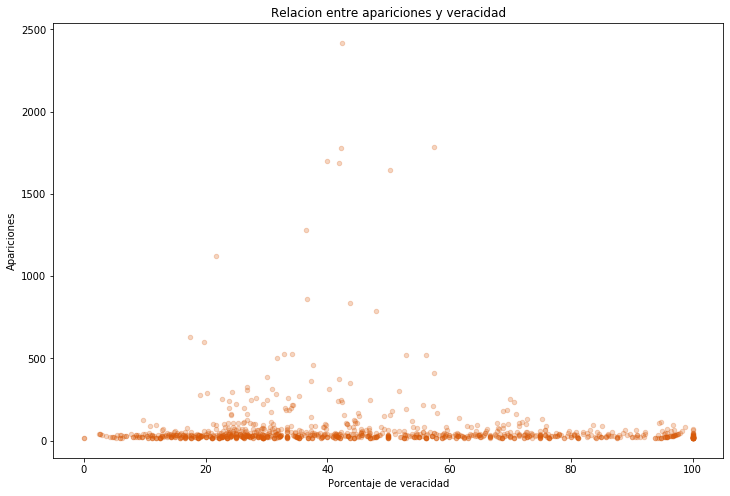

In [46]:
agrupadas.plot.scatter('porcentaje_veraces','apariciones_totales', title='Relacion entre apariciones y veracidad',alpha=0.25,figsize=(12,8), color = color);
ax=plt.gca()
ax.set_ylabel('Apariciones')
ax.set_xlabel('Porcentaje de veracidad');

#### Parece haber muy pocas palabras con mas de 500 apariciones, y como es obvio las que lo cumplen tienden a rondar el 50% de veracidad. Elimino estas al no tener relevancia en el analisis.


In [47]:
agrupadas_short = agrupadas.loc[agrupadas[('apariciones_totales')]<500,:]

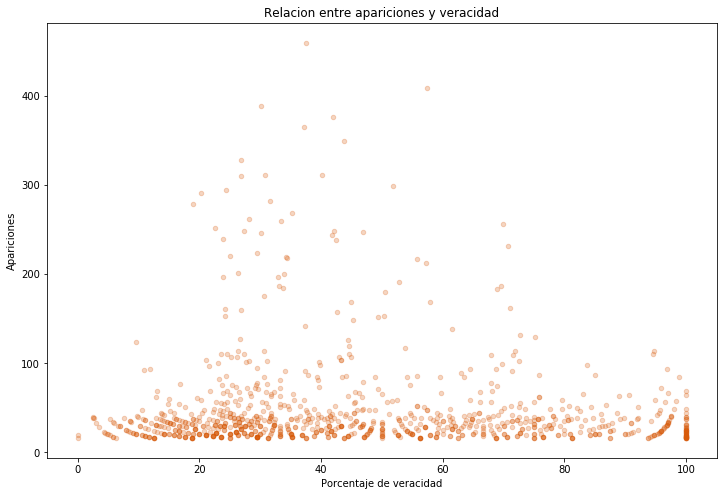

In [48]:
agrupadas_short.plot.scatter('porcentaje_veraces','apariciones_totales', title='Relacion entre apariciones y veracidad',alpha=0.25,figsize=(12,8), color = color);
ax=plt.gca();
ax=plt.gca()
ax.set_ylabel('Apariciones')
ax.set_xlabel('Porcentaje de veracidad');

#### Se sigue demostrando una gran acumulacion debajo de las 100 apariciones, vuelvo a filtrar.

In [49]:
agrupadas_short = agrupadas.loc[agrupadas[('apariciones_totales')]<100,:]

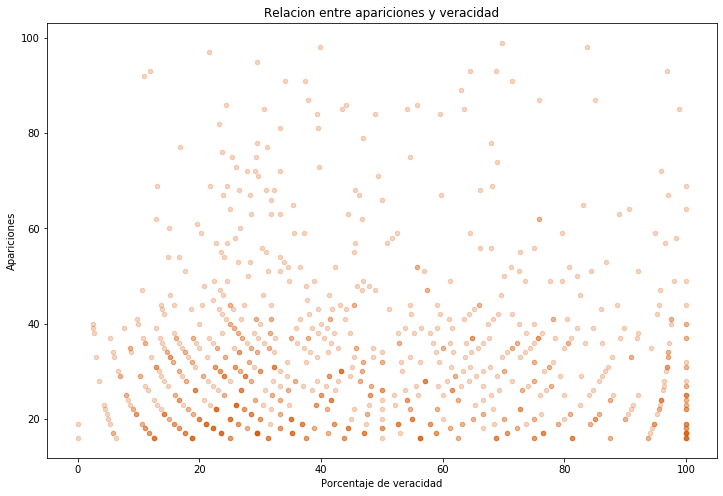

In [50]:
agrupadas_short.plot.scatter('porcentaje_veraces','apariciones_totales', title='Relacion entre apariciones y veracidad',alpha=0.25,figsize=(12,8), color = color);
ax=plt.gca()
ax.set_ylabel('Apariciones')
ax.set_xlabel('Porcentaje de veracidad');

#### EXPLICAR PORQUE EL GRAFICO TIENE ESAS COSAS REDONDITAS.

#### Como es de esperarse vemos una agrupacion de muchas palabras en 100% de veracidad, esto se debe a que la muestra no es suficientemente grande. 

#### Luego se puede observar que al buscar palabras con mayo numero de apariciones, el procentaje de veracidad se encuentra alrededor del 50%.

#### Cantidad de apariciones con 100% de veracidad

In [51]:
agrupadas_short = agrupadas.loc[agrupadas[('porcentaje_veraces')]==100,:]

Text(0.5, 1.0, 'Apariciones de palabras con 100% de veracidad')

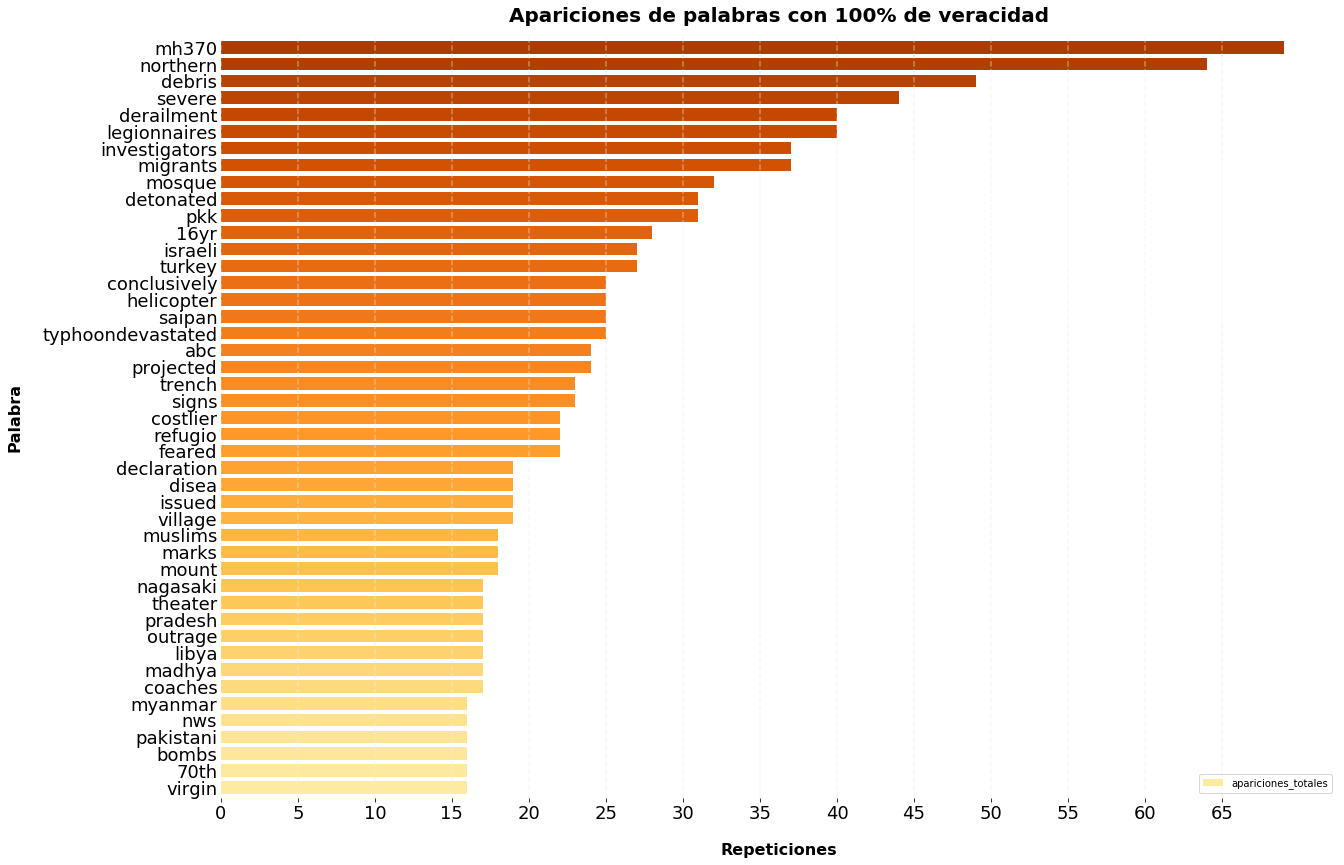

In [52]:
saltos = np.linspace(0.2, 0.9, 50)
colores = cmap(saltos)

maximo = agrupadas_short['apariciones_totales'].max()

grafico = agrupadas_short.sort_values("apariciones_totales").plot(kind='barh', figsize=(20,14), y ='apariciones_totales', color=colores, width=0.75, fontsize = 18)

plt.xticks(np.arange(0, maximo+1, 5))
plt.tick_params(axis='y', length=0)

grafico.spines['right'].set_visible(False)
grafico.spines['top'].set_visible(False)
grafico.spines['left'].set_visible(False)
grafico.spines['bottom'].set_visible(False)

lineas = grafico.get_xticks()
for i in lineas:
      grafico.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
grafico.set_xlabel("Repeticiones", labelpad=20, weight='bold', size=16)
grafico.set_ylabel("Palabra", labelpad=20, weight='bold', size=16)

plt.title("Apariciones de palabras con 100% de veracidad", weight='bold', size=20, pad=15)

#### Quiero graficar todas las palabras que tienen por lo menos un 90% de veracidad, me parece algo interesante.

In [53]:
agrupadas_short = agrupadas.loc[agrupadas[('porcentaje_veraces')]>=90,:]
agrupadas_short.head()

,apariciones_veraces,apariciones_falaces,apariciones_totales,porcentaje_veraces
palabra,,,,
mh370,69,0,69,100.0
northern,64,0,64,100.0
debris,49,0,49,100.0
severe,44,0,44,100.0
derailment,40,0,40,100.0


In [54]:
agrupadas_short.info()


<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, mh370 to heavy
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   apariciones_veraces  101 non-null    int64  
 1   apariciones_falaces  101 non-null    int64  
 2   apariciones_totales  101 non-null    int64  
 3   porcentaje_veraces   101 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.9+ KB


#### Tengo 100 items, un wordcloud es una buena idea. El tamaño va asociado a la cantidad de repeticiones, el color a el % de veracidad.

In [55]:
color_wordcloud = cmap(np.linspace(0.4, .9,101))
colores_rgb = ()
for i in color_wordcloud:
    #convierto rgba en rgb
    aux = list(i)
    del aux[3]
    aux = (int(x * 255) for x in aux)
    aux =tuple(aux)
    colores_rgb = colores_rgb + (aux,)
    


In [56]:
#cosa de mandinga, no tocar    
def my_tf_color_func_mayor_veracidad(dictionary):
  def my_tf_color_func_inner(word, font_size, position, orientation, random_state=None, **kwargs):
    return colores_rgb[int ( (dictionary[word]-90)*10) ]
  return my_tf_color_func_inner   

In [57]:
indices = list(agrupadas_short.index)
valores = list(agrupadas_short['apariciones_totales'])
todas_las_palabras = list()

In [58]:
for i in range( len(indices) ):
    for j in range ( valores[i] ):
        todas_las_palabras.append(indices[i])

In [59]:
todas_las_palabras = pd.Series(todas_las_palabras).to_string()

In [60]:
mask = np.array(Image.open("../TP1-Organizacion-de-Datos/imagenes/ovalo.png"))

In [61]:
keys = {}
veracidades = agrupadas_short['porcentaje_veraces'].tolist()

for i in range(len(indices)):
    keys[indices[i]] = veracidades[i]


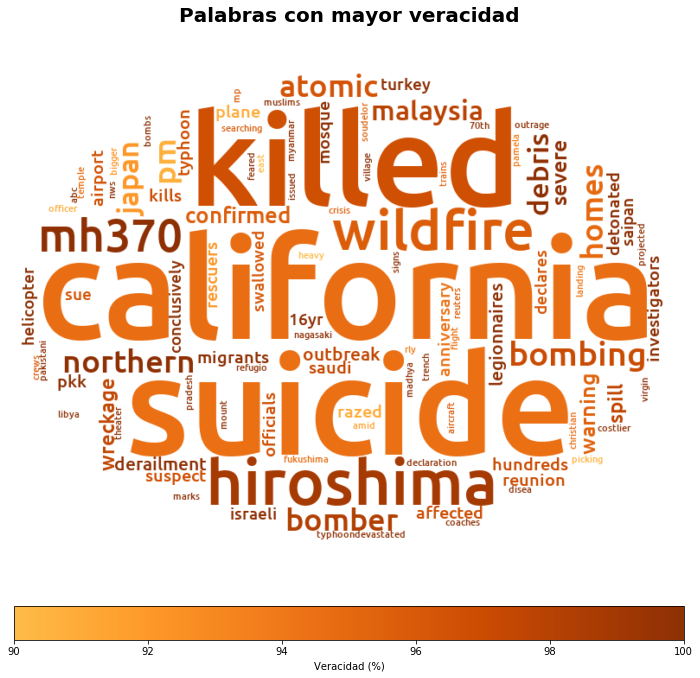

In [62]:
plt.figure(figsize= (16,12) )
wordcloud = WordCloud(font_path='../fonts/truetype/ubuntu/Ubuntu-M.ttf',collocations=False, colormap=cmap, \
                      relative_scaling=0.5, background_color='white', width=800, height=200, \
                      color_func=my_tf_color_func_mayor_veracidad(keys), normalize_plurals=False, mask=mask, prefer_horizontal=0.5).generate(todas_las_palabras)

topes = mpl.colors.Normalize(vmin=90, vmax=100)
cmap_wordcloud = ListedColormap(cmap(np.linspace(0.4, 0.9, 256)))

plt.imshow(wordcloud, interpolation='bilinear')
plt.colorbar(cm.ScalarMappable(norm=topes, cmap=cmap_wordcloud), label='Veracidad (%)', \
             orientation='horizontal', shrink=0.75, pad=0.05)
plt.axis("off")
plt.title("Palabras con mayor veracidad", weight='bold', size=20, pad=30)
plt.show()